In [1]:
import os
import networkx as nx
import numpy as np
import json
import pandas as pd
import seaborn as sns

import random
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
from networkx.generators.random_graphs import erdos_renyi_graph, barabasi_albert_graph

In [3]:
# import AnomalousCommunityDetector from parent directory
original_cur_dir = os.getcwd()
os.chdir('..')
from AnomalyInfusedCommunityStructuredRandomNetworkGenerator.AnomalyInfusedCommunityStructuredRandomNetworkGeneratorCrisis import AnomalyInfusedCommunityStructuredRandomNetworkGenerator
from AnomalyInfusedCommunityStructuredRandomNetworkGenerator.AnomalyInfusedCommunityStructuredRandomNetworkGenerator import AnomalyInfusedCommunityStructuredRandomNetworkGenerator
from AnomalousCommunityDetection.BiPartiteCreator import BiPartiteCreator
from AnomalousCommunityDetection.NetworkSampler import NetworkSampler
from AnomalousCommunityDetection.FeatureExtractor import FeatureExtractor
from AnomalousCommunityDetection.LinkPredictor import LinkPredictor
from AnomalousCommunityDetection.MetaFeatureExtractor import MetaFeatureExtractor
from AnomalousCommunityDetection.MetaFeatureRanker import MetaFeatureRanker
os.chdir(original_cur_dir)

In [4]:
from scipy.stats import powerlaw

In [5]:
reddit_dir = 'E:\Datasets\April_2017_Reddit'
file_name = 'subreddits_sizes.json'
file_path = os.path.join(reddit_dir, file_name)

In [6]:
with open(file_path, 'r', encoding='utf8') as file:
    subreddits_sizes = json.load(file)

In [7]:
len(subreddits_sizes)

12870

In [8]:
#with open('community_sizes.json', 'w') as file:
#    json.dump(sorted(list(subreddits_sizes.values())), file)

In [9]:
min(subreddits_sizes.values())

30

In [10]:
random_seed = 10

In [11]:
def set_random_seed(random_seed):
    random.seed(random_seed)
    np.random.seed(random_seed)

In [12]:
remove_last = 2000
sample = 110

sorted_sizes = np.array(sorted(subreddits_sizes.values())[:-remove_last])
print(np.mean(sorted_sizes))
set_random_seed(random_seed) # set random seed
sorted_sizes = np.sort(np.random.choice(sorted_sizes, sample, replace=False))
sorted_sizes

268.0045998160074


array([  30,   30,   30,   30,   31,   31,   32,   32,   33,   33,   34,
         34,   34,   35,   36,   39,   41,   41,   42,   45,   47,   49,
         51,   51,   51,   52,   53,   53,   55,   59,   60,   64,   66,
         67,   70,   71,   71,   75,   76,   79,   80,   86,   87,   90,
         90,  103,  103,  105,  106,  114,  119,  125,  127,  138,  138,
        138,  141,  153,  153,  155,  160,  165,  170,  176,  179,  191,
        193,  196,  208,  209,  209,  223,  250,  252,  268,  269,  275,
        275,  286,  300,  324,  344,  363,  365,  367,  369,  392,  393,
        393,  403,  411,  419,  437,  526,  542,  547,  574,  591,  601,
        627,  720,  736,  918,  971,  976,  993,  997, 1325, 1390, 1469])

In [13]:
np.mean(sorted_sizes)

256.3727272727273

#### Generate Community Structured Random Network

In [14]:
save_dir = 'tests'
test_bpg_save_path = os.path.join(save_dir, 'test_bpg.gml')
test_feats_save_pats = os.path.join(save_dir, 'test_feats.csv')

In [15]:
norm_comm_alg = barabasi_albert_graph
#anom_comm_alg = erdos_renyi_graph
anom_comm_alg = barabasi_albert_graph

p_inter = 0.2
k_min = 1
k_max = 1

In [16]:
normal_community_sizes = list(sorted_sizes)
normal_m = 1

#anomalous_community_sizes = [33,35,37,39,41, 43, 45, 47, 49, 51]
anomalous_community_sizes = [i for i in range(30, 40)]  # small comms
anomalous_community_sizes = [i for i in range(2075, 2095)]  # biggest comms
anomalous_community_sizes = [i for i in range(1990, 2010)]  # almost biggest comms

anomalous_community_sizes = [i for i in range(50, 70)]  # 50-70
anomalous_community_sizes = [i for i in range(245, 265)]  # 245, 265 - around mean size of all comms

anomalous_community_sizes = [i for i in range(590, 610)]  # 245, 265 - around mean size of all comms

set_random_seed(random_seed) # set random seed
anomalous_community_sizes = np.random.choice(sorted_sizes,10, replace=False).tolist()  # random sizes

#anomalous_community_sizes = [30]
anomalous_m = 1
anomalous_community_sizes

[736, 300, 53, 90, 127, 393, 75, 86, 30, 76]

In [17]:
# testing when there are anomalies also in train set

normal_community_sizes = list(sorted_sizes)
normal_m = 1

anomalous_community_sizes = [i for i in range(30, 40)]  # small comms
anomalous_m = 1
anomalous_community_sizes

[30, 31, 32, 33, 34, 35, 36, 37, 38, 39]

In [18]:
generator = AnomalyInfusedCommunityStructuredRandomNetworkGenerator(
    norm_comm_alg, anom_comm_alg, p_inter, k_min, k_max, random_seed)

In [19]:
G = generator.generate_network(normal_community_sizes, normal_m, anomalous_community_sizes, anomalous_m)

In [20]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 28546
Number of edges: 34091
Average degree:   2.3885


In [21]:
sum(dict(G.degree).values()) / len(G.nodes)

2.3884957612274924

#### Analayze Community Sizes

In [22]:
partitons_map = generator.get_partitions()

In [23]:
orig_partitions_sizes = {k: len(v) for k, v in zip(partitons_map.keys(), generator._partitions)}
#orig_partitions_sizes

In [24]:
updt_partitions_sizes = {k: len(v) for k, v in generator.get_partitions().items()}
updt_partitions_sizes

{'comm0001': 40,
 'comm0002': 36,
 'comm0003': 36,
 'comm0004': 34,
 'comm0005': 36,
 'comm0006': 36,
 'comm0007': 38,
 'comm0008': 37,
 'comm0009': 37,
 'comm0010': 38,
 'comm0011': 37,
 'comm0012': 40,
 'comm0013': 46,
 'comm0014': 41,
 'comm0015': 46,
 'comm0016': 47,
 'comm0017': 47,
 'comm0018': 50,
 'comm0019': 49,
 'comm0020': 56,
 'comm0021': 58,
 'comm0022': 61,
 'comm0023': 65,
 'comm0024': 61,
 'comm0025': 62,
 'comm0026': 66,
 'comm0027': 60,
 'comm0028': 64,
 'comm0029': 71,
 'comm0030': 68,
 'comm0031': 66,
 'comm0032': 77,
 'comm0033': 80,
 'comm0034': 77,
 'comm0035': 94,
 'comm0036': 85,
 'comm0037': 84,
 'comm0038': 86,
 'comm0039': 92,
 'comm0040': 100,
 'comm0041': 95,
 'comm0042': 104,
 'comm0043': 100,
 'comm0044': 109,
 'comm0045': 112,
 'comm0046': 119,
 'comm0047': 125,
 'comm0048': 120,
 'comm0049': 126,
 'comm0050': 139,
 'comm0051': 144,
 'comm0052': 151,
 'comm0053': 153,
 'comm0054': 162,
 'comm0055': 165,
 'comm0056': 163,
 'comm0057': 168,
 'comm0058': 1

In [25]:
paritions_additions = {k: updt_partitions_sizes[k] - orig_partitions_sizes[k] for k in updt_partitions_sizes.keys()}
paritions_additions

{'comm0001': 10,
 'comm0002': 6,
 'comm0003': 6,
 'comm0004': 4,
 'comm0005': 5,
 'comm0006': 5,
 'comm0007': 6,
 'comm0008': 5,
 'comm0009': 4,
 'comm0010': 5,
 'comm0011': 3,
 'comm0012': 6,
 'comm0013': 12,
 'comm0014': 6,
 'comm0015': 10,
 'comm0016': 8,
 'comm0017': 6,
 'comm0018': 9,
 'comm0019': 7,
 'comm0020': 11,
 'comm0021': 11,
 'comm0022': 12,
 'comm0023': 14,
 'comm0024': 10,
 'comm0025': 11,
 'comm0026': 14,
 'comm0027': 7,
 'comm0028': 11,
 'comm0029': 16,
 'comm0030': 9,
 'comm0031': 6,
 'comm0032': 13,
 'comm0033': 14,
 'comm0034': 10,
 'comm0035': 24,
 'comm0036': 14,
 'comm0037': 13,
 'comm0038': 11,
 'comm0039': 16,
 'comm0040': 21,
 'comm0041': 15,
 'comm0042': 18,
 'comm0043': 13,
 'comm0044': 19,
 'comm0045': 22,
 'comm0046': 16,
 'comm0047': 22,
 'comm0048': 15,
 'comm0049': 20,
 'comm0050': 25,
 'comm0051': 25,
 'comm0052': 26,
 'comm0053': 26,
 'comm0054': 24,
 'comm0055': 27,
 'comm0056': 25,
 'comm0057': 27,
 'comm0058': 29,
 'comm0059': 31,
 'comm0060': 31,

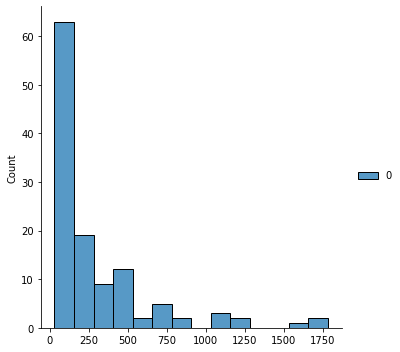

In [26]:
sns.displot(updt_partitions_sizes.values(), bins='auto')

In [27]:
{f'size {k}': f'num communities {v}'
 for k,v
 in sorted(list(Counter(updt_partitions_sizes.values()).items()), key=lambda x: x[0])
}

{'size 30': 'num communities 1',
 'size 31': 'num communities 1',
 'size 32': 'num communities 1',
 'size 33': 'num communities 1',
 'size 34': 'num communities 2',
 'size 35': 'num communities 1',
 'size 36': 'num communities 5',
 'size 37': 'num communities 4',
 'size 38': 'num communities 3',
 'size 39': 'num communities 1',
 'size 40': 'num communities 2',
 'size 41': 'num communities 1',
 'size 46': 'num communities 2',
 'size 47': 'num communities 2',
 'size 49': 'num communities 1',
 'size 50': 'num communities 1',
 'size 56': 'num communities 1',
 'size 58': 'num communities 1',
 'size 60': 'num communities 1',
 'size 61': 'num communities 2',
 'size 62': 'num communities 1',
 'size 64': 'num communities 1',
 'size 65': 'num communities 1',
 'size 66': 'num communities 2',
 'size 68': 'num communities 1',
 'size 71': 'num communities 1',
 'size 77': 'num communities 2',
 'size 80': 'num communities 1',
 'size 84': 'num communities 1',
 'size 85': 'num communities 1',
 'size 86'

# Create Train and Test communties' sets

In [28]:
train_size = 20

In [29]:
num_anom_comms = len(anomalous_community_sizes)
num_anom_comms

10

In [30]:
# create a list of normal communties to sample from
normal_comms_pop = list(updt_partitions_sizes.keys())[:-num_anom_comms]

# sample normal communities' names
set_random_seed(random_seed) # set random seed
train_set_comms = random.sample(normal_comms_pop, train_size)

# create test set communities from the rest of nbrmal communities and the anomalous communities
test_set_comms = [c for c in updt_partitions_sizes.keys() if c not in train_set_comms]

In [31]:
print(len(train_set_comms))
print(len(test_set_comms))

20
100


In [32]:
# testing anomaly in train set

#train_set_comms.append(test_set_comms.pop(90))
#test_set_comms.append(train_set_comms.pop(10))
#print(len(train_set_comms))
#print(len(test_set_comms))

In [33]:
#train_set_comms = list(updt_partitions_sizes.keys())[:split]
#test_set_comms = list(updt_partitions_sizes.keys())[split:]

In [34]:
train_partitions_map = {k:v for k,v in partitons_map.items() if k in train_set_comms}
test_partitions_map = {k:v for k,v in partitons_map.items() if k in test_set_comms}

In [35]:
#train_partitions_map

In [36]:
#test_partitions_map

#### Create BiPartie Network

In [37]:
BPG_train_generator = BiPartiteCreator(train_partitions_map)
BPG_train = BPG_train_generator.create_bipartite_graph(train_set_comms)
BPG_train_generator.print_properties()

 BiPartite network properties:
	Number of 'Community'-partite vertices: 20
	Number of 'Vertex'-partite vertices: 6271
	Total number of vertices: 6291
	Total number of edges: 6473


In [38]:
BPG_test_generator = BiPartiteCreator(test_partitions_map)
BPG_test = BPG_test_generator.create_bipartite_graph(test_set_comms)
BPG_test_generator.print_properties()

 BiPartite network properties:
	Number of 'Community'-partite vertices: 100
	Number of 'Vertex'-partite vertices: 23983
	Total number of vertices: 24083
	Total number of edges: 27738


In [39]:
nx.write_gml(BPG_test, path=test_bpg_save_path)

In [40]:
#BPG_train.nodes

In [41]:
#BPG_test.nodes

#### Extract Topological Features

In [42]:
sampler = NetworkSampler('Community', 'Vertex')

In [43]:
train_set_positive_edges, train_set_negative_edge = sampler.sample_network_edges(BPG_train, None, True)
test_set_positive_edges, _ = sampler.sample_network_edges(BPG_test, None, False)

In [44]:
def verify(pos_edges, neg_edges, bpg):
    print(f'num pos edges: {len(pos_edges)}')
    print(f'num neg edges: {len(neg_edges)}')
    
    # check that the graph contains all positive edges. sum should be equal to number of positive edges.
    print(f'graph contains positive edges: {np.array([bpg.has_edge(*edge) for edge in pos_edges]).sum()} == {len(pos_edges)}')
    
    # check that the graph contains all positive edges. sum should be equal to number of positive edges.
    print(f'graph contains negative edges: {np.array([bpg.has_edge(*edge) for edge in neg_edges]).sum()} == 0')

In [45]:
verify(train_set_positive_edges, train_set_negative_edge, BPG_train)

num pos edges: 6473
num neg edges: 6473
graph contains positive edges: 6473 == 6473
graph contains negative edges: 0 == 0


In [46]:
verify(test_set_positive_edges, [], BPG_test)

num pos edges: 27738
num neg edges: 0
graph contains positive edges: 27738 == 27738
graph contains negative edges: 0.0 == 0


In [47]:
train_feat_extracor = FeatureExtractor(BPG_train)
test_feat_extracor = FeatureExtractor(BPG_test)

In [48]:
train_topo_feat_df = train_feat_extracor.create_topological_features_df(train_set_positive_edges, train_set_negative_edge)
train_topo_feat_df.head()

  6%|████████▍                                                                                                                                         | 375/6473 [00:00<00:01, 3721.47it/s]


Extracting positive edges features...



  2%|███▎                                                                                                                                              | 145/6473 [00:00<00:04, 1424.90it/s]


Extracting negative edges features...



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6473/6473 [00:04<00:00, 1345.82it/s]


,total_friends,preferential_attachment_score,friends_measure,shortest_path,vertex_1_degree,vertex_2_degree,edge_exist
"(comm0002, 10012)",37,36,1,3,36,1,0
"(comm0002, 10017)",37,36,1,3,36,1,0
"(comm0002, 10037)",37,36,1,3,36,1,0
"(comm0002, 10075)",37,36,1,3,36,1,0
"(comm0002, 10089)",37,36,1,3,36,1,0


In [49]:
test_topo_feat_df = test_feat_extracor.create_topological_features_df(test_set_positive_edges, None, save=True, save_dir_path=test_feats_save_pats)
test_topo_feat_df.head()

  1%|█▊                                                                                                                                               | 349/27738 [00:00<00:15, 1734.99it/s]


Extracting positive edges features...



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27738/27738 [00:14<00:00, 1919.61it/s]
0it [00:00, ?it/s]



Extracting negative edges features...



,total_friends,preferential_attachment_score,friends_measure,shortest_path,vertex_1_degree,vertex_2_degree,edge_exist
"(comm0001, 1)",39,0,0,-1,39,0,1
"(comm0001, 10)",39,0,0,-1,39,0,1
"(comm0001, 11)",39,0,0,-1,39,0,1
"(comm0001, 1193)",40,39,0,5,39,1,1
"(comm0001, 12)",39,0,0,-1,39,0,1


#### classifier

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

In [51]:
from xgboost import XGBClassifier

In [52]:
# instantiate topological feature classifier, with a classifier object and train set
topo_feat_clf = LinkPredictor(XGBClassifier())
#topo_feat_clf = LinkPredictor(LogisticRegression())

topo_feat_clf.fit(train_topo_feat_df, 'edge_exist', verbose=True)

Validation scores:
	Precision : 1.0
	Accuracy  : 0.993
	F1        : 0.992
	ROC AUC   : 0.992

                  Predicted
                   0     1   
                ------------- 
            0  | 665  | 0    |
     True      |-------------|
            1  | 9    | 621  |
                ------------- 
            


In [53]:
# read csv file
test_topo_feat_df = pd.read_csv(test_feats_save_pats, index_col=0)
#test_topo_feat_df

In [54]:
edges_exist_prob_dict = topo_feat_clf.get_edges_existence_prob(test_topo_feat_df, verbose=True)

Test set edge existence predictions:
	predicted_exist: 21301
	predicted_not_exist: 6437
	predicted_ratio: 0.767


#### Meta-Feature Extrction

In [55]:
meta_feat_extractor = MetaFeatureExtractor(edges_exist_prob_dict)
meta_feats_dict = meta_feat_extractor.get_comm_repr_vertices_meta_features(thresh=0.8)

In [56]:
pd.DataFrame.from_dict(meta_feats_dict, orient='index')

,normality_prob_mean,normality_prob_std,normality_prob_median,predicted_label_mean,predicted_label_std,weighted_sum
comm0001,0.601481,0.516036,0.996635,0.600000,0.510102,7.923807415067797
comm0003,0.992067,0.999639,0.992276,1.000000,1.000000,11.969232561520647
comm0004,0.992128,0.999682,0.992276,1.000000,1.000000,11.9696307974735
comm0006,0.992036,0.999569,0.992276,1.000000,1.000000,11.969217562222266
comm0007,0.763662,0.581801,0.996635,0.763158,0.574855,10.58384161622569
comm0008,0.752138,0.576437,0.992276,0.756757,0.570959,10.44695975345706
comm0009,0.778818,0.593589,0.992276,0.783784,0.588337,10.838313158780952
comm0011,0.805515,0.613369,0.992276,0.810811,0.608341,11.21042032540273
comm0012,0.774471,0.587681,0.996635,0.775000,0.582418,10.753746435463146
comm0013,0.674472,0.536861,0.996635,0.673913,0.531220,9.188014871013287


#### MetaFeatureRanker

In [57]:
meta_feat_ranker = MetaFeatureRanker(meta_feats_dict)
meta_feat_ranker.rank_columns()

In [58]:
meta_feat_ranker.sort_by_meta_features()[:10]

,normality_prob_mean_rank,normality_prob_mean_comm,normality_prob_std_rank,normality_prob_std_comm,normality_prob_median_rank,normality_prob_median_comm,predicted_label_mean_rank,predicted_label_mean_comm,predicted_label_std_rank,predicted_label_std_comm,weighted_sum_rank,weighted_sum_comm
0,1,comm0001,1,comm0001,1,comm0003,1,comm0001,1,comm0001,1,comm0001
1,2,comm0035,2,comm0035,1,comm0004,2,comm0035,2,comm0035,2,comm0035
2,3,comm0013,3,comm0013,1,comm0006,3,comm0013,3,comm0013,3,comm0013
3,4,comm0023,4,comm0023,1,comm0118,4,comm0029,4,comm0029,4,comm0023
4,5,comm0045,5,comm0045,1,comm0008,5,comm0023,5,comm0023,5,comm0029
5,6,comm0029,6,comm0033,1,comm0009,6,comm0045,6,comm0045,6,comm0045
6,7,comm0033,7,comm0029,1,comm0011,7,comm0033,7,comm0033,7,comm0033
7,8,comm0015,8,comm0015,1,comm0117,8,comm0040,8,comm0040,8,comm0040
8,9,comm0026,9,comm0026,1,comm0116,9,comm0081,9,comm0081,9,comm0015
9,10,comm0040,10,comm0014,1,comm0115,10,comm0015,10,comm0015,10,comm0026


In [59]:
meta_feat_ranker.sort_by_meta_features()[-10:]

,normality_prob_mean_rank,normality_prob_mean_comm,normality_prob_std_rank,normality_prob_std_comm,normality_prob_median_rank,normality_prob_median_comm,predicted_label_mean_rank,predicted_label_mean_comm,predicted_label_std_rank,predicted_label_std_comm,weighted_sum_rank,weighted_sum_comm
90,91,comm0006,91,comm0006,14,comm0048,88,comm0003,88,comm0003,91,comm0003
91,92,comm0003,92,comm0117,14,comm0046,88,comm0004,88,comm0004,92,comm0117
92,93,comm0117,93,comm0003,15,comm0107,88,comm0006,88,comm0006,93,comm0113
93,94,comm0113,94,comm0113,15,comm0053,88,comm0111,88,comm0111,94,comm0004
94,95,comm0004,95,comm0004,15,comm0054,88,comm0112,88,comm0112,95,comm0112
95,96,comm0112,96,comm0112,15,comm0056,88,comm0113,88,comm0113,96,comm0111
96,97,comm0111,97,comm0111,15,comm0057,88,comm0114,88,comm0114,97,comm0114
97,98,comm0114,98,comm0114,15,comm0058,88,comm0115,88,comm0115,98,comm0115
98,99,comm0115,99,comm0115,15,comm0059,88,comm0116,88,comm0116,99,comm0116
99,100,comm0116,100,comm0116,15,comm0052,88,comm0117,88,comm0117,100,comm0103


#### Feature importance using Logistic regression coeffients

In [ ]:
#feat_importance = {col: np.round(coef, 3) for col, coef in zip(test_topo_feat_df.columns, topo_feat_clf._model.coef_[0])}

In [ ]:
#{k: v for k, v in sorted(feat_importance.items(), key=lambda item: np.abs(item[1]), reverse=True)}

#### Feature importance using SHAP to explain XGBoost

In [ ]:
import shap

In [ ]:
shap_values = shap.TreeExplainer(topo_feat_clf._model).shap_values(test_topo_feat_df[:][cols])
shap.summary_plot(shap_values, test_topo_feat_df[:][cols])#, plot_type="bar")